# Stock Price prediction using Linear Regression

In [2]:
# Importing the necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tabulate import tabulate

## Defining all the required functions

In [4]:
# Define a function to clean the data by removing unnecessary columns
def clean_data(data):
    """Removes unnecessary columns ('Dividends', 'Volume', 'Stock Splits') from the data."""
    data = data.drop('Dividends', axis=1)
    data = data.drop('Volume', axis=1)
    data = data.drop('Stock Splits', axis=1)
    return data

# Define a function to fetch stock data for a given period
def get_data(ticker, period):
    """
    Fetches historical stock prices and returns cleaned data.

    Args:
        period (str): The time period for fetching stock data. E.g., '1y', '2y', etc.

    Returns:
        pd.DataFrame: Cleaned historical stock prices for Facebook.
    """
    # Fetch data for the given ticker
    get_stock_info = yf.Ticker(ticker)
    
    # Get historical stock data for the given period
    stock_historical = get_stock_info.history(period)
    
    # Clean the data
    stock_historical = clean_data(stock_historical)
    
    return stock_historical

# Define a function to prepare the feature matrix (X) and target vector (y) for training
def define_data(data):
    """
    Prepares the feature matrix (X) and target vector (y) for model training.

    Args:
        data (pd.DataFrame): The cleaned historical stock data.

    Returns:
        tuple: x_train, x_test, y_train, y_test
            x_train, x_test: Feature matrices for training and testing
            y_train, y_test: Target vectors for training and testing
    """
    # The target variable is 'Close' (stock price at the end of the day)
    y = pd.DataFrame(data.pop('Close'))
    
    # Features: 'Open', 'High', 'Low' stock prices
    list_of_cols = ["Open", "High", "Low"]
    X = data[list_of_cols]
    
    # Split the data into training and testing sets (80%-20% split)
    X_train, X_test, y_train, y_test = train_test_split(X[list_of_cols], y, test_size=0.1)
    
    # Convert data to numpy arrays
    x_train = np.array(X_train)
    x_test = np.array(X_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    
    return x_train, x_test, y_train, y_test

# Define a function to add a bias term (intercept) to the feature matrix
def add_bias(x_train, x_test):
    """
    Adds a bias (intercept) term to the feature matrices for training and testing.

    Args:
        x_train (np.ndarray): The feature matrix for training.
        x_test (np.ndarray): The feature matrix for testing.

    Returns:
        tuple: x_train, x_test with added bias term (column of ones).
    """
    # Add a column of ones to both training and testing feature matrices
    x_train = np.c_[np.ones(x_train.shape[0]), x_train]
    x_test = np.c_[np.ones(x_test.shape[0]), x_test]
    
    return x_train, x_test

# Normal Equation to compute the optimal weights (coefficients) for linear regression
def normal_equation(x, y, alpha=0):
    """
    Computes the optimal weights using the normal equation.

    Args:
        x (np.ndarray): The feature matrix (including bias).
        y (np.ndarray): The target vector.
        alpha (float, optional): Regularization parameter. Default is 0.

    Returns:
        np.ndarray: The optimal weights (theta).
    """
    x_transpose = np.transpose(x)
    identity = np.identity(x.shape[1])  # Identity matrix for regularization
    theta = np.linalg.inv(x_transpose.dot(x) + alpha * identity).dot(x_transpose).dot(y)
    
    return theta

# Gradient Descent to iteratively update weights
def gradient_descent(x, y, alpha, learning_rate, num_iterations):
    """
    Implements gradient descent to optimize the weights of the linear model.

    Args:
        x (np.ndarray): The feature matrix (including bias).
        y (np.ndarray): The target vector.
        alpha (float): Regularization parameter.
        learning_rate (float): The learning rate for gradient descent.
        num_iterations (int): The number of iterations to run gradient descent.

    Returns:
        np.ndarray: The optimized weights (theta) after gradient descent.
    """
    m, n = x.shape
    x_transpose = np.transpose(x)
    identity = np.identity(x.shape[1])  # Identity matrix for regularization
    theta = np.linalg.inv(x_transpose.dot(x) + alpha * identity).dot(x_transpose).dot(y)
    
    for i in range(num_iterations):
        # Compute predictions
        y_pred = np.dot(x, theta)
        
        # Compute the gradient
        gradient = (1 / m) * np.dot(x.T, (y_pred - y))
        
        # Update the weights (theta)
        theta = theta - learning_rate * gradient
    
    return theta

## Execution

In [6]:
# Fetch historical stock data for Facebook (META) for the last 2 years
stock_data = get_data('META', '2y')

In [7]:
# Prepare training and testing data
x_train, x_test, y_train, y_test = define_data(stock_data)

# Add bias term (intercept) to the feature matrices
x_train, x_test = add_bias(x_train, x_test)

In [8]:
#Check for NaN values in the training data (x_train and y_train)
print("Checking for NaN values in x_train and y_train:")

# Check for NaNs in the feature matrix (x_train) and target (y_train)
nan_in_x_train = np.isnan(x_train).any(axis=1) 
nan_in_y_train = np.isnan(y_train)

print(f"NaNs in x_train: {np.sum(nan_in_x_train)} rows")
print(f"NaNs in y_train: {np.sum(nan_in_y_train)} rows")

# Remove rows with NaN values from x_train and y_train
x_train_clean = x_train[~nan_in_x_train]
y_train_clean = y_train[~nan_in_y_train]

# Check the test data (x_test and y_test)
print("Checking for NaN values in x_test and y_test:")

# Check for NaNs in the test set (x_test and y_test)
nan_in_x_test = np.isnan(x_test).any(axis=1)
nan_in_y_test = np.isnan(y_test)

print(f"NaNs in x_test: {np.sum(nan_in_x_test)} rows")
print(f"NaNs in y_test: {np.sum(nan_in_y_test)} rows")

# Remove rows with NaN values from x_test and y_test
x_test_clean = x_test[~nan_in_x_test]
y_test_clean = y_test[~nan_in_y_test]

Checking for NaN values in x_train and y_train:
NaNs in x_train: 0 rows
NaNs in y_train: 0 rows
Checking for NaN values in x_test and y_test:
NaNs in x_test: 0 rows
NaNs in y_test: 0 rows


In [9]:
alpha_values = [0, 0.01, 0.1, 1, 10]  # Experiment with different alpha values
learning_rate = 0.0001
num_iterations = 5

### Normal Equation

In [11]:
# Create an empty list to store the results
results_NE = []

# Print the header for the Normal Equation method
print("\033[1mNormal Equation method\033[0m")

for alpha in alpha_values:
    # Train the model using the normal equation
    theta = normal_equation(x_train, y_train, alpha=alpha)

    # Make predictions on the test set
    y_pred = x_test.dot(theta)

    # Calculate the Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)

    # Append the results to the list
    results_NE.append([alpha, mse])

# Print the results as a table
headers = ["Alpha", "MSE"]
print(tabulate(results_NE, headers, tablefmt="pretty"))

Normal Equation method
+-------+-------------------+
| Alpha |        MSE        |
+-------+-------------------+
|   0   | 8.52845156511311  |
| 0.01  | 8.52840846355972  |
|  0.1  | 8.52802142395261  |
|   1   | 8.524236214907825 |
|  10   | 8.49325907238673  |
+-------+-------------------+


We notice that the MSE is almost consistent across all values of alpha

### Gradient Descent

In [14]:
# Create an empty list to store the results
results_GD = []

# Print the header for the Gradient Descent method
print("\033[1mGradient Descent method\033[0m")

# Loop through alpha values for Gradient Descent
for alpha in alpha_values:
    # Train the model using Gradient Descent
    theta = gradient_descent(x_train, y_train, alpha, learning_rate, num_iterations)

    # Make predictions on the test set
    y_pred = x_test.dot(theta)

    # Calculate the Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)

    # Append the results to the list
    results_GD.append([alpha, mse])

# Print the results as a table
headers = ["Alpha", "MSE"]
print(tabulate(results_GD, headers, tablefmt="pretty"))

Gradient Descent method
+-------+--------------------+
| Alpha |        MSE         |
+-------+--------------------+
|   0   | 8.862429986964255  |
| 0.01  | 64.84283145980794  |
|  0.1  | 4911.078003395501  |
|   1   | 482274.39128443773 |
|  10   | 48118354.494755305 |
+-------+--------------------+


We notice that the MSE decreases as the alpha approaches 0

## Plotting for 6-months data

In [17]:
six_month_data = get_data('META', '6mo')
x_train, x_test, y_train, y_test = define_data(six_month_data)

### Normal Equation

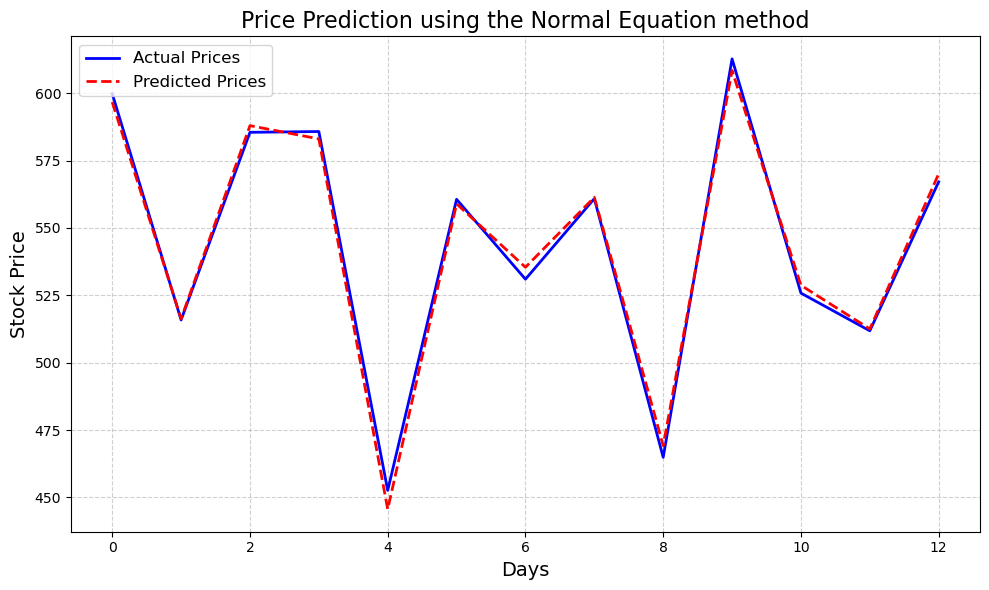

In [19]:
# Train the model using the normal equation
theta = normal_equation(x_train, y_train, alpha=0.01)

# Make predictions on the test set
y_pred = x_test.dot(theta)

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Prices', color='blue', linestyle='-', linewidth=2)
plt.plot(y_pred, label='Predicted Prices', color='red', linestyle='--', linewidth=2)
plt.title('Price Prediction using the Normal Equation method', fontsize=16)
plt.xlabel('Days', fontsize=14)
plt.ylabel('Stock Price', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

### Gradient Descent

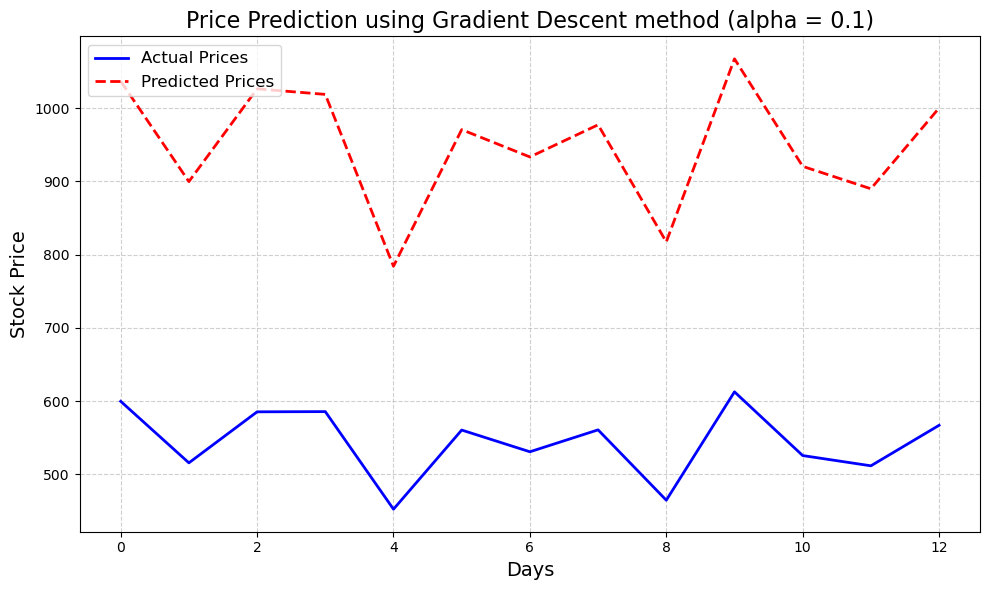

In [21]:
# Train the model using the GD
theta = gradient_descent(x_train, y_train, alpha=0.01, learning_rate=0.0001, num_iterations=5)

# Make predictions on the test set
y_pred_GD = x_test.dot(theta)

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Prices', color='blue', linestyle='-', linewidth=2)
plt.plot(y_pred_GD, label='Predicted Prices', color='red', linestyle='--', linewidth=2)
plt.title('Price Prediction using Gradient Descent method (alpha = 0.1)', fontsize=16)
plt.xlabel('Days', fontsize=14)
plt.ylabel('Stock Price', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

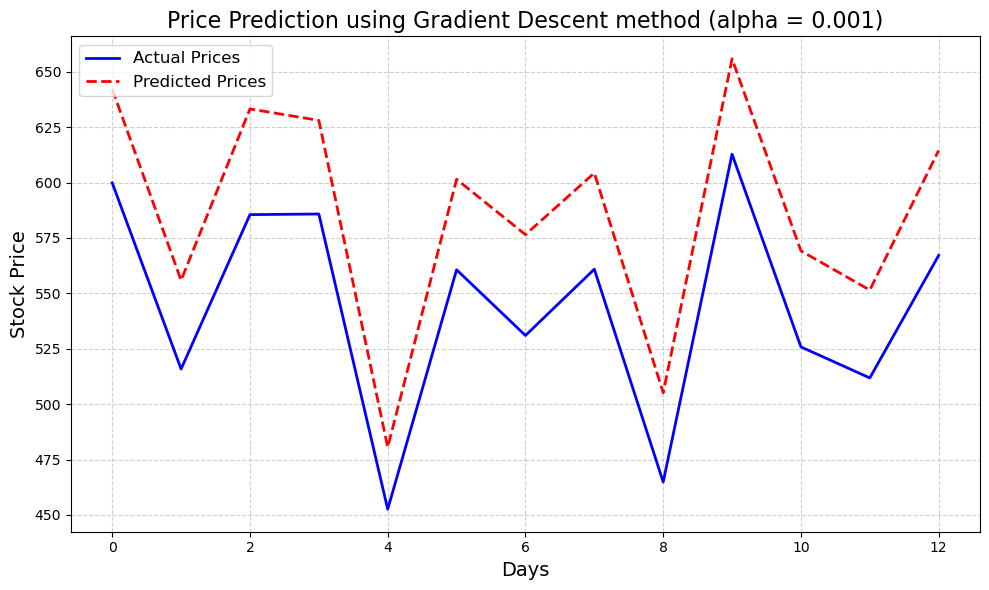

In [22]:
# Train the model using the GD
theta = gradient_descent(x_train, y_train, alpha=0.001, learning_rate=0.0001, num_iterations=5)

# Make predictions on the test set
y_pred_GD = x_test.dot(theta)

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Prices', color='blue', linestyle='-', linewidth=2)
plt.plot(y_pred_GD, label='Predicted Prices', color='red', linestyle='--', linewidth=2)
plt.title('Price Prediction using Gradient Descent method (alpha = 0.001)', fontsize=16)
plt.xlabel('Days', fontsize=14)
plt.ylabel('Stock Price', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

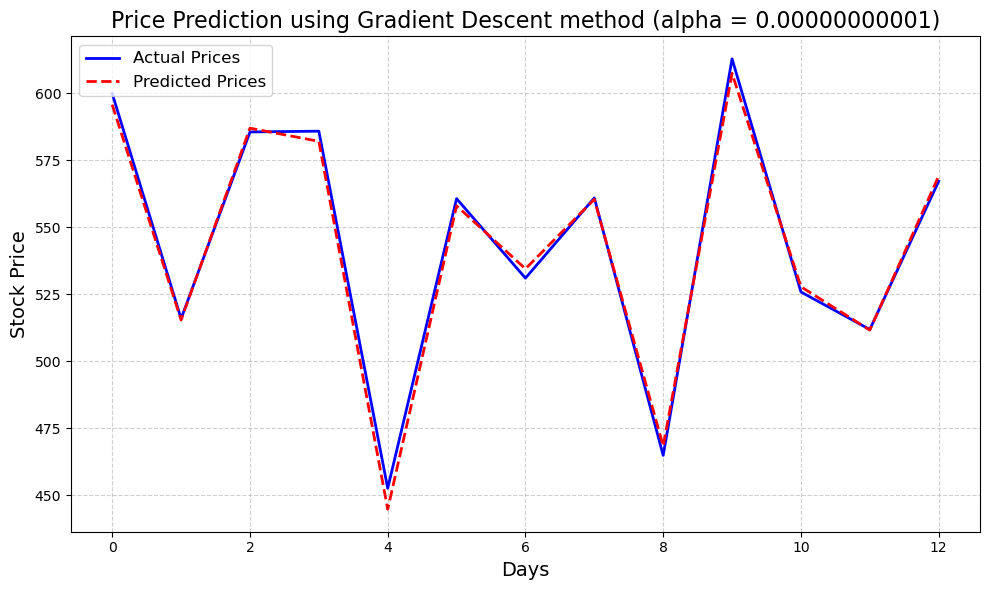

In [23]:
# Train the model using the GD
theta = gradient_descent(x_train, y_train, alpha=0.00000000001, learning_rate=0.0001, num_iterations=5)

# Make predictions on the test set
y_pred_GD = x_test.dot(theta)

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Prices', color='blue', linestyle='-', linewidth=2)
plt.plot(y_pred_GD, label='Predicted Prices', color='red', linestyle='--', linewidth=2)
plt.title('Price Prediction using Gradient Descent method (alpha = 0.00000000001)', fontsize=16)
plt.xlabel('Days', fontsize=14)
plt.ylabel('Stock Price', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

We can draw the same conclusion, as alpha approaches zero, the Gradient Descent method leads to a better price prediction, even better than the Normal Equation method, as we saw previously in the MSE table.